# # Table of Contents
# 1. [Importing Libraries](#import-libraries)
# 2. [Assumption Analysis in Linear Regression](#analysis-regresion)

# # Importing Libraries <a id="import-libraries"></a>

In [11]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from project_pwc.config import FIGURES_DIR

In [12]:
df = pd.read_csv('C:/Users/Usuario/Documents/prueba_pwc/predictive_salary_model/data/processed/dataset_features.csv')

# # Assumption Analysis in Linear Regression <a id="analysis-regresion"></a>

In [9]:
def analyze_linear_residuals(df: pd.DataFrame, output_dir: str = "figure") -> None:

    X = df.drop(columns=["Salary", "Salary_log"], errors="ignore")
    y = df["Salary"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    residuals = y_test - y_pred

    os.makedirs(output_dir, exist_ok=True)

    plt.figure(figsize=(6,4))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.7, color="teal")
    plt.axhline(0, color='red', ls='--')
    plt.title("Residuals vs. Predicted (Linear Regression)")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")

    output_path_1 = os.path.join(FIGURES_DIR, "residuals_vs_predicted.png")
    plt.savefig(output_path_1)
    print(f"Gráfico 'Residuals vs. Predicted' guardado en: {output_path_1}")

    plt.figure(figsize=(6,4))
    probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Residuals")
    
    output_path_2 = os.path.join(FIGURES_DIR, "qq_plot.png")
    plt.savefig(output_path_2)
    print(f"Q-Q Plot guardado en: {output_path_2}")

Gráfico 'Residuals vs. Predicted' guardado en: C:\Users\Usuario\Documents\prueba_pwc\predictive_salary_model\reports\figures\residuals_vs_predicted.png
Q-Q Plot guardado en: C:\Users\Usuario\Documents\prueba_pwc\predictive_salary_model\reports\figures\qq_plot.png


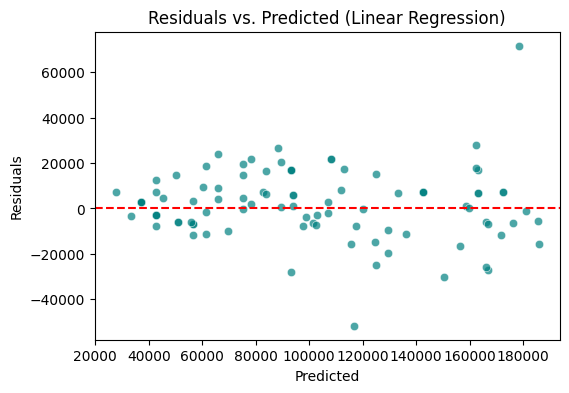

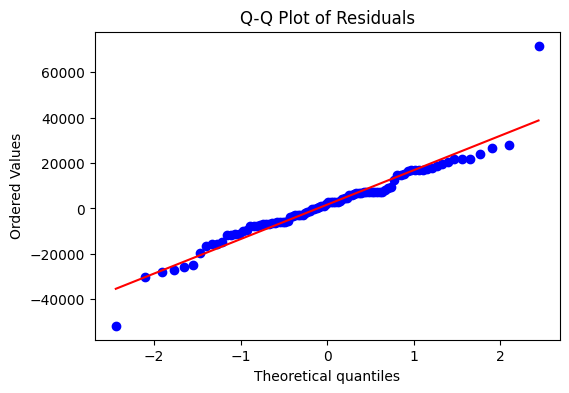

In [10]:
analyze_linear_residuals(df)